# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [53]:
df = pd.read_csv("../cardiovascular_disease_raw.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [54]:
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# 1. BASIC DATA INFORMATION
# =============================================================================

print("=" * 60)
print("CARDIOVASCULAR DISEASE DATASET - EDA REPORT")
print("=" * 60)

# Dataset shape
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   - Rows (samples): {df.shape[0]:,}")
print(f"   - Columns (features): {df.shape[1]}")

# Basic info
print("\n" + "=" * 40)
print("📋 DATASET BASIC INFORMATION")
print("=" * 40)
print(df.info())

# Column names and types
print("\n" + "=" * 40)
print("🏷️  COLUMN DETAILS")
print("=" * 40)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:<15} | {dtype}")

CARDIOVASCULAR DISEASE DATASET - EDA REPORT

📊 Dataset Shape: (70000, 13)
   - Rows (samples): 70,000
   - Columns (features): 13

📋 DATASET BASIC INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

🏷️  COLUMN DETAILS
 1. id              | int6

In [55]:
# =============================================================================
# 2. MISSING VALUES ANALYSIS
# =============================================================================

print("\n" + "=" * 40)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 40)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df)

if missing_data.sum() == 0:
    print("✅ Great! No missing values found in the dataset.")
else:
    print(f"⚠️  Total missing values: {missing_data.sum()}")


🔍 MISSING VALUES ANALYSIS
             Missing Count  Missing Percentage
id                       0                 0.0
age                      0                 0.0
gender                   0                 0.0
height                   0                 0.0
weight                   0                 0.0
ap_hi                    0                 0.0
ap_lo                    0                 0.0
cholesterol              0                 0.0
gluc                     0                 0.0
smoke                    0                 0.0
alco                     0                 0.0
active                   0                 0.0
cardio                   0                 0.0
✅ Great! No missing values found in the dataset.


In [56]:
# =============================================================================
# 3. DESCRIPTIVE STATISTICS
# =============================================================================

print("\n" + "=" * 40)
print("📈 DESCRIPTIVE STATISTICS")
print("=" * 40)

# Numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns: {numerical_cols}")

print("\n📊 Statistical Summary:")
print(df.describe().round(2))


📈 DESCRIPTIVE STATISTICS

Numerical columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

📊 Statistical Summary:
             id       age    gender    height    weight     ap_hi     ap_lo  \
count  70000.00  70000.00  70000.00  70000.00  70000.00  70000.00  70000.00   
mean   49972.42  19468.87      1.35    164.36     74.21    128.82     96.63   
std    28851.30   2467.25      0.48      8.21     14.40    154.01    188.47   
min        0.00  10798.00      1.00     55.00     10.00   -150.00    -70.00   
25%    25006.75  17664.00      1.00    159.00     65.00    120.00     80.00   
50%    50001.50  19703.00      1.00    165.00     72.00    120.00     80.00   
75%    74889.25  21327.00      2.00    170.00     82.00    140.00     90.00   
max    99999.00  23713.00      2.00    250.00    200.00  16020.00  11000.00   

       cholesterol      gluc     smoke      alco   active   cardio  
count     70000.00  70000.0

In [57]:

# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 40)
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 40)

# Assuming 'cardio' is the target variable
if 'cardio' in df.columns:
    target_col = 'cardio'
    
    # Value counts
    target_counts = df[target_col].value_counts()
    target_percent = df[target_col].value_counts(normalize=True) * 100
    
    print(f"\n{target_col.upper()} Distribution:")
    for val, count, pct in zip(target_counts.index, target_counts.values, target_percent.values):
        status = "With CVD" if val == 1 else "Without CVD"
        print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    # Check for class imbalance
    imbalance_ratio = target_counts.max() / target_counts.min()
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}")
    if imbalance_ratio > 1.5:
        print("⚠️  Dataset shows class imbalance - consider balancing techniques")
    else:
        print("✅ Dataset is relatively balanced")


🎯 TARGET VARIABLE ANALYSIS

CARDIO Distribution:
  Without CVD: 35,021 (50.0%)
  With CVD: 34,979 (50.0%)

Class Imbalance Ratio: 1.00
✅ Dataset is relatively balanced



📊 CREATING VISUALIZATIONS...


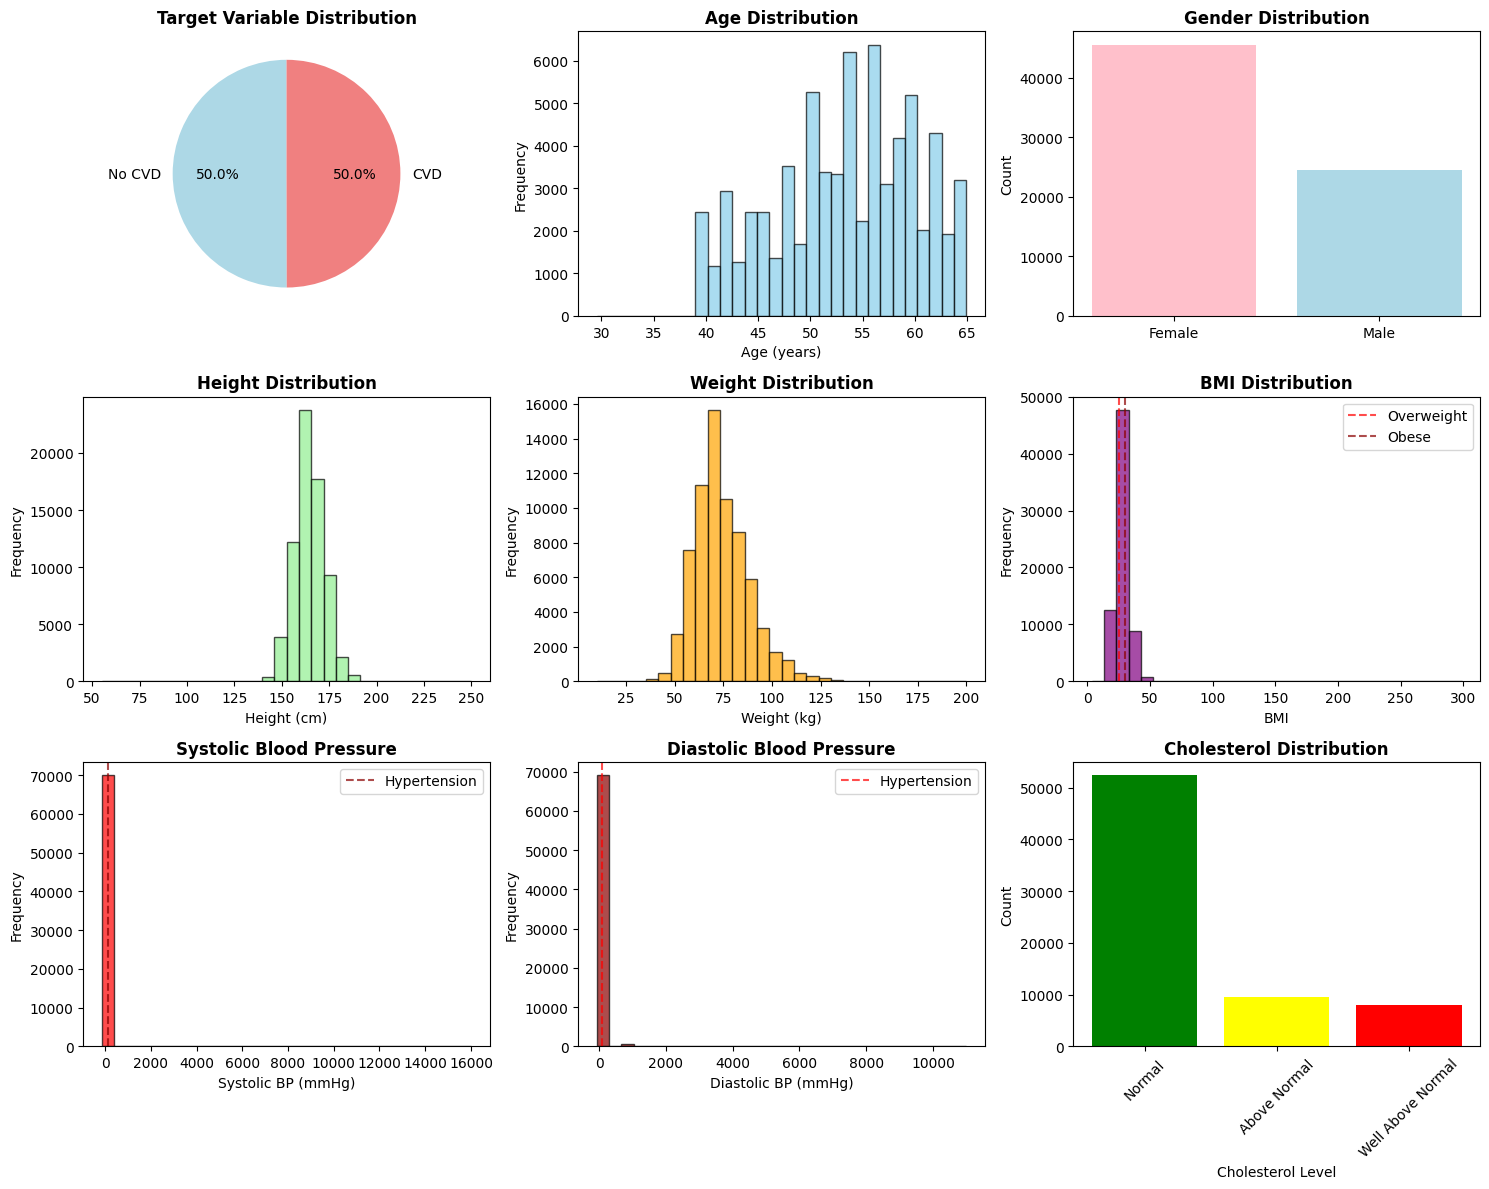

In [58]:
# =============================================================================
# 5. VISUALIZATION SECTION
# =============================================================================

print("\n" + "=" * 40)
print("📊 CREATING VISUALIZATIONS...")
print("=" * 40)

# Calculate number of plots needed
n_numerical = len(numerical_cols)
n_rows = (n_numerical + 2) // 3 if n_numerical > 0 else 1

# Figure 1: Target Distribution
plt.figure(figsize=(15, 12))

# Target distribution
plt.subplot(3, 3, 1)
if 'cardio' in df.columns:
    target_counts = df['cardio'].value_counts()
    labels = ['No CVD', 'CVD']
    colors = ['lightblue', 'lightcoral']
    
    plt.pie(target_counts.values, labels=labels, autopct='%1.1f%%', 
            colors=colors, startangle=90)
    plt.title('Target Variable Distribution', fontsize=12, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Target variable not found', ha='center', va='center')
    plt.title('Target Variable Distribution', fontsize=12, fontweight='bold')

# Age distribution
plt.subplot(3, 3, 2)
if 'age' in df.columns:
    # Convert age from days to years if needed
    if df['age'].mean() > 365:
        age_years = df['age'] / 365.25
        plt.hist(age_years, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel('Age (years)')
        plt.title('Age Distribution', fontsize=12, fontweight='bold')
    else:
        plt.hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel('Age')
        plt.title('Age Distribution', fontsize=12, fontweight='bold')
    plt.ylabel('Frequency')

# Gender distribution
plt.subplot(3, 3, 3)
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
    labels = ['Female' if x == 1 else 'Male' for x in gender_counts.index]
    plt.bar(labels, gender_counts.values, color=['pink', 'lightblue'])
    plt.title('Gender Distribution', fontsize=12, fontweight='bold')
    plt.ylabel('Count')

# Height distribution
plt.subplot(3, 3, 4)
if 'height' in df.columns:
    plt.hist(df['height'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.xlabel('Height (cm)')
    plt.ylabel('Frequency')
    plt.title('Height Distribution', fontsize=12, fontweight='bold')

# Weight distribution
plt.subplot(3, 3, 5)
if 'weight' in df.columns:
    plt.hist(df['weight'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    plt.title('Weight Distribution', fontsize=12, fontweight='bold')

# BMI calculation and distribution
plt.subplot(3, 3, 6)
if 'height' in df.columns and 'weight' in df.columns:
    bmi = df['weight'] / ((df['height'] / 100) ** 2)
    plt.hist(bmi, bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.title('BMI Distribution', fontsize=12, fontweight='bold')
    plt.axvline(x=25, color='red', linestyle='--', alpha=0.7, label='Overweight')
    plt.axvline(x=30, color='darkred', linestyle='--', alpha=0.7, label='Obese')
    plt.legend()

# Blood pressure systolic
plt.subplot(3, 3, 7)
if 'ap_hi' in df.columns:
    plt.hist(df['ap_hi'], bins=30, alpha=0.7, color='red', edgecolor='black')
    plt.xlabel('Systolic BP (mmHg)')
    plt.ylabel('Frequency')
    plt.title('Systolic Blood Pressure', fontsize=12, fontweight='bold')
    plt.axvline(x=140, color='darkred', linestyle='--', alpha=0.7, label='Hypertension')
    plt.legend()

# Blood pressure diastolic
plt.subplot(3, 3, 8)
if 'ap_lo' in df.columns:
    plt.hist(df['ap_lo'], bins=30, alpha=0.7, color='darkred', edgecolor='black')
    plt.xlabel('Diastolic BP (mmHg)')
    plt.ylabel('Frequency')
    plt.title('Diastolic Blood Pressure', fontsize=12, fontweight='bold')
    plt.axvline(x=90, color='red', linestyle='--', alpha=0.7, label='Hypertension')
    plt.legend()

# Cholesterol levels
plt.subplot(3, 3, 9)
if 'cholesterol' in df.columns:
    chol_counts = df['cholesterol'].value_counts().sort_index()
    labels = ['Normal', 'Above Normal', 'Well Above Normal']
    plt.bar(range(len(chol_counts)), chol_counts.values, color=['green', 'yellow', 'red'])
    plt.xlabel('Cholesterol Level')
    plt.ylabel('Count')
    plt.title('Cholesterol Distribution', fontsize=12, fontweight='bold')
    plt.xticks(range(len(chol_counts)), labels, rotation=45)

plt.tight_layout()
plt.show()


🔗 CORRELATION ANALYSIS


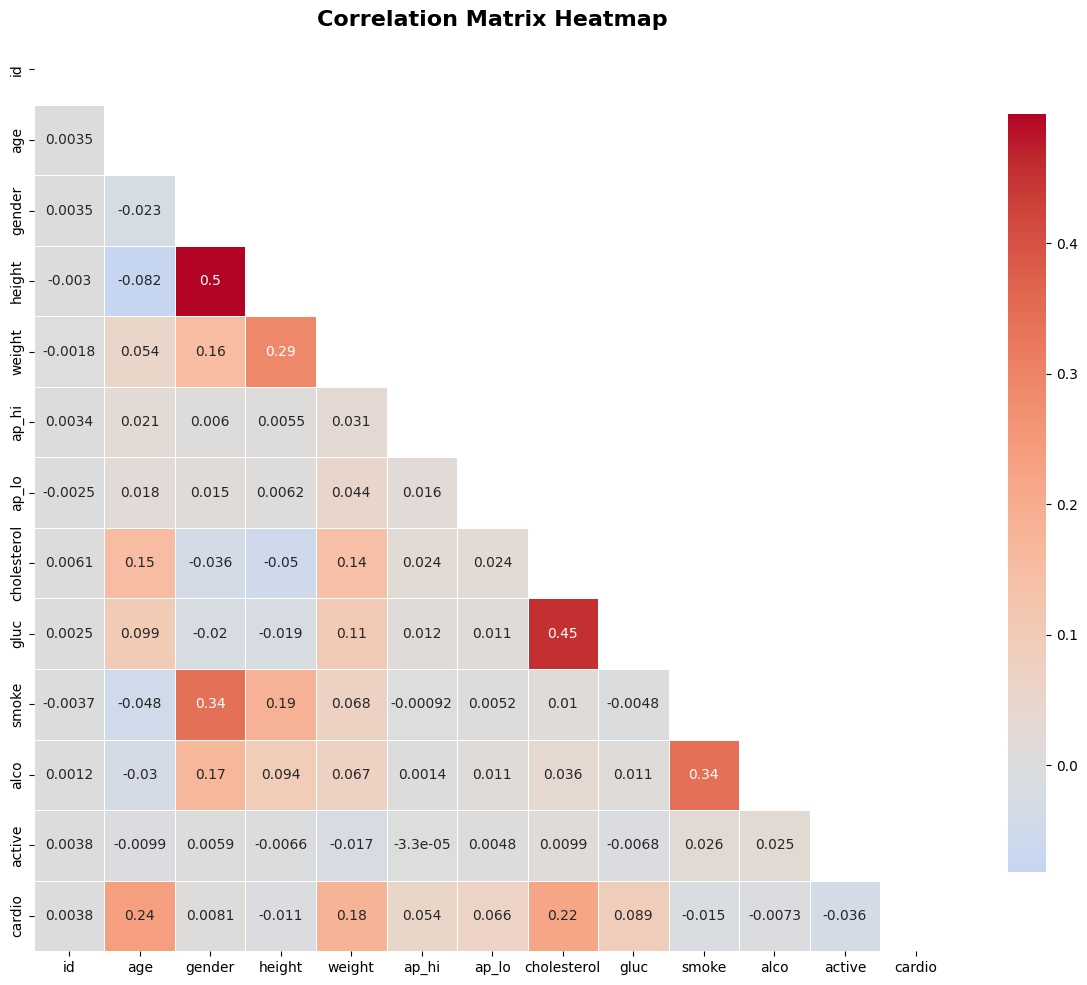


🔍 Strong Correlations (|r| > 0.5):
  No strong correlations found (|r| > 0.5)


In [59]:
# =============================================================================
# 6. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 40)
print("🔗 CORRELATION ANALYSIS")
print("=" * 40)

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Strong correlations
print("\n🔍 Strong Correlations (|r| > 0.5):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

if strong_corr:
    for col1, col2, corr_val in strong_corr:
        print(f"  {col1} ↔ {col2}: {corr_val:.3f}")
else:
    print("  No strong correlations found (|r| > 0.5)")


🚨 OUTLIER DETECTION


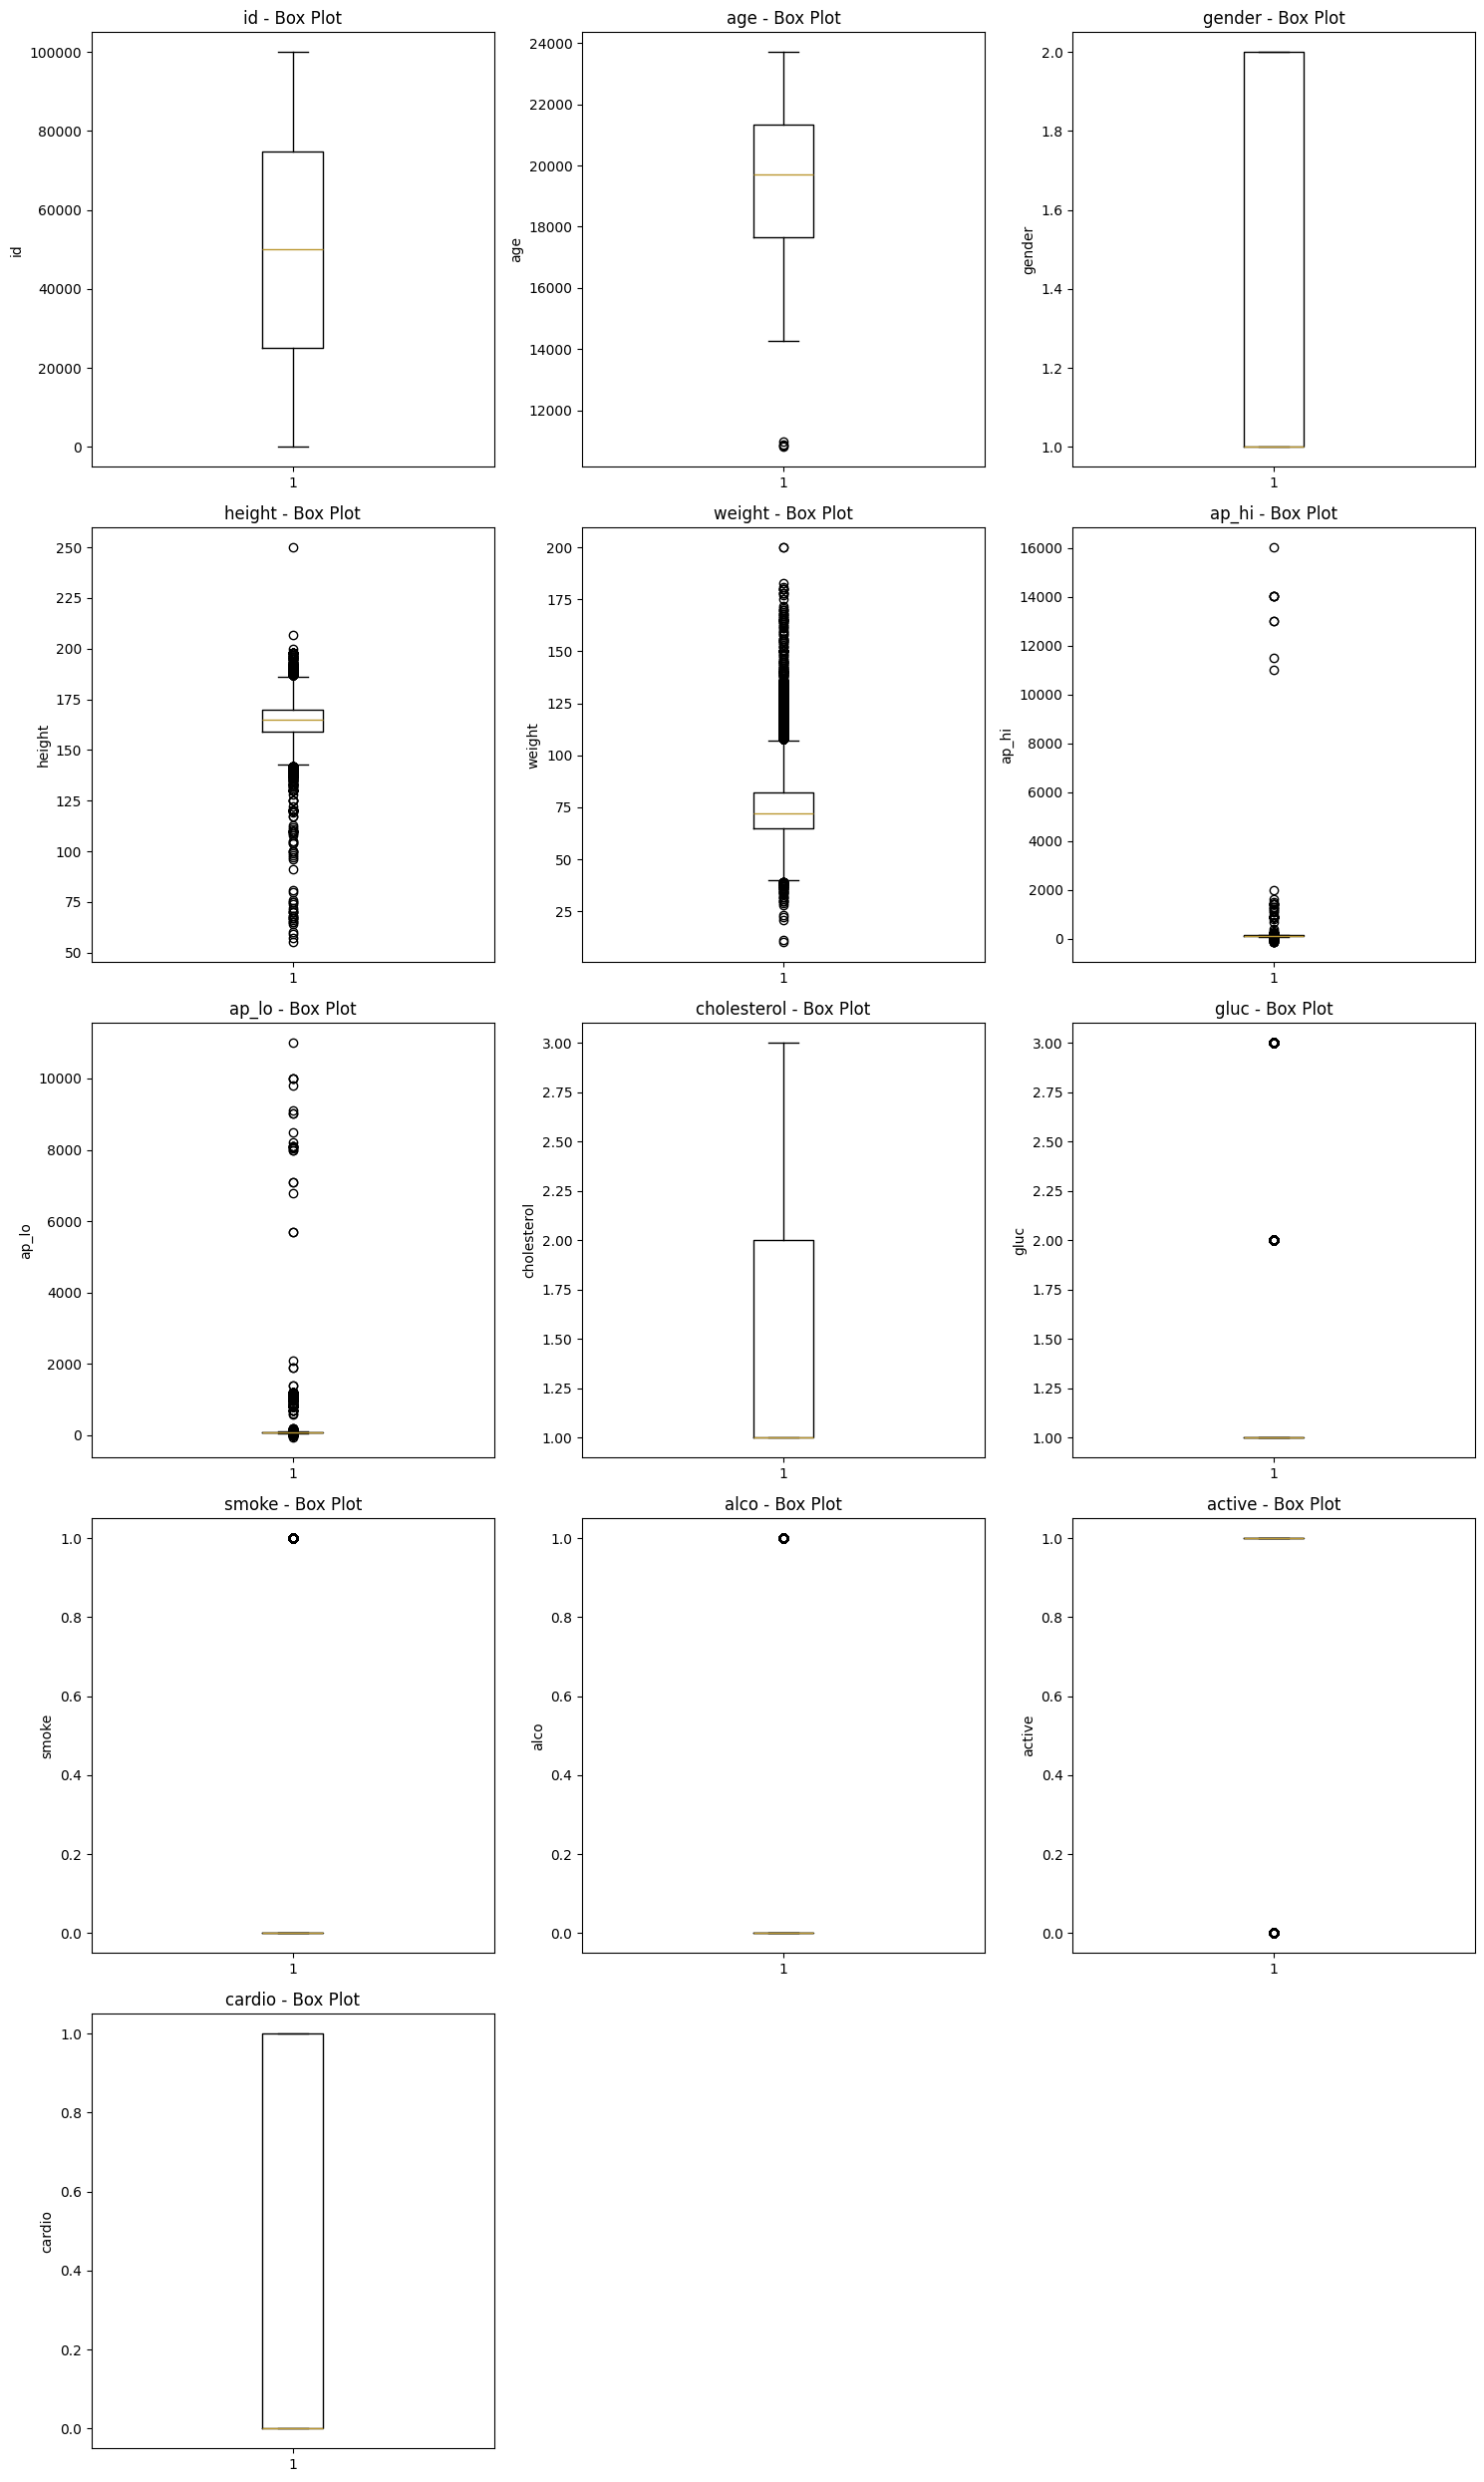


📊 Outlier Summary (IQR Method):
  id             : 0 outliers (0.0%)
  age            : 4 outliers (0.0%)
  gender         : 0 outliers (0.0%)
  height         : 519 outliers (0.7%)
  weight         : 1,819 outliers (2.6%)
  ap_hi          : 1,435 outliers (2.1%)
  ap_lo          : 4,632 outliers (6.6%)
  cholesterol    : 0 outliers (0.0%)
  gluc           : 10,521 outliers (15.0%)
  smoke          : 6,169 outliers (8.8%)
  alco           : 3,764 outliers (5.4%)
  active         : 13,739 outliers (19.6%)
  cardio         : 0 outliers (0.0%)


In [60]:
# =============================================================================
# 7. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 40)
print("🚨 OUTLIER DETECTION")
print("=" * 40)

# Box plots for numerical variables
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'{col} - Box Plot')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# IQR method for outlier detection
print("\n📊 Outlier Summary (IQR Method):")
outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percent,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"  {col:<15}: {outlier_count:,} outliers ({outlier_percent:.1f}%)")


🎯 RELATIONSHIPS WITH TARGET VARIABLE


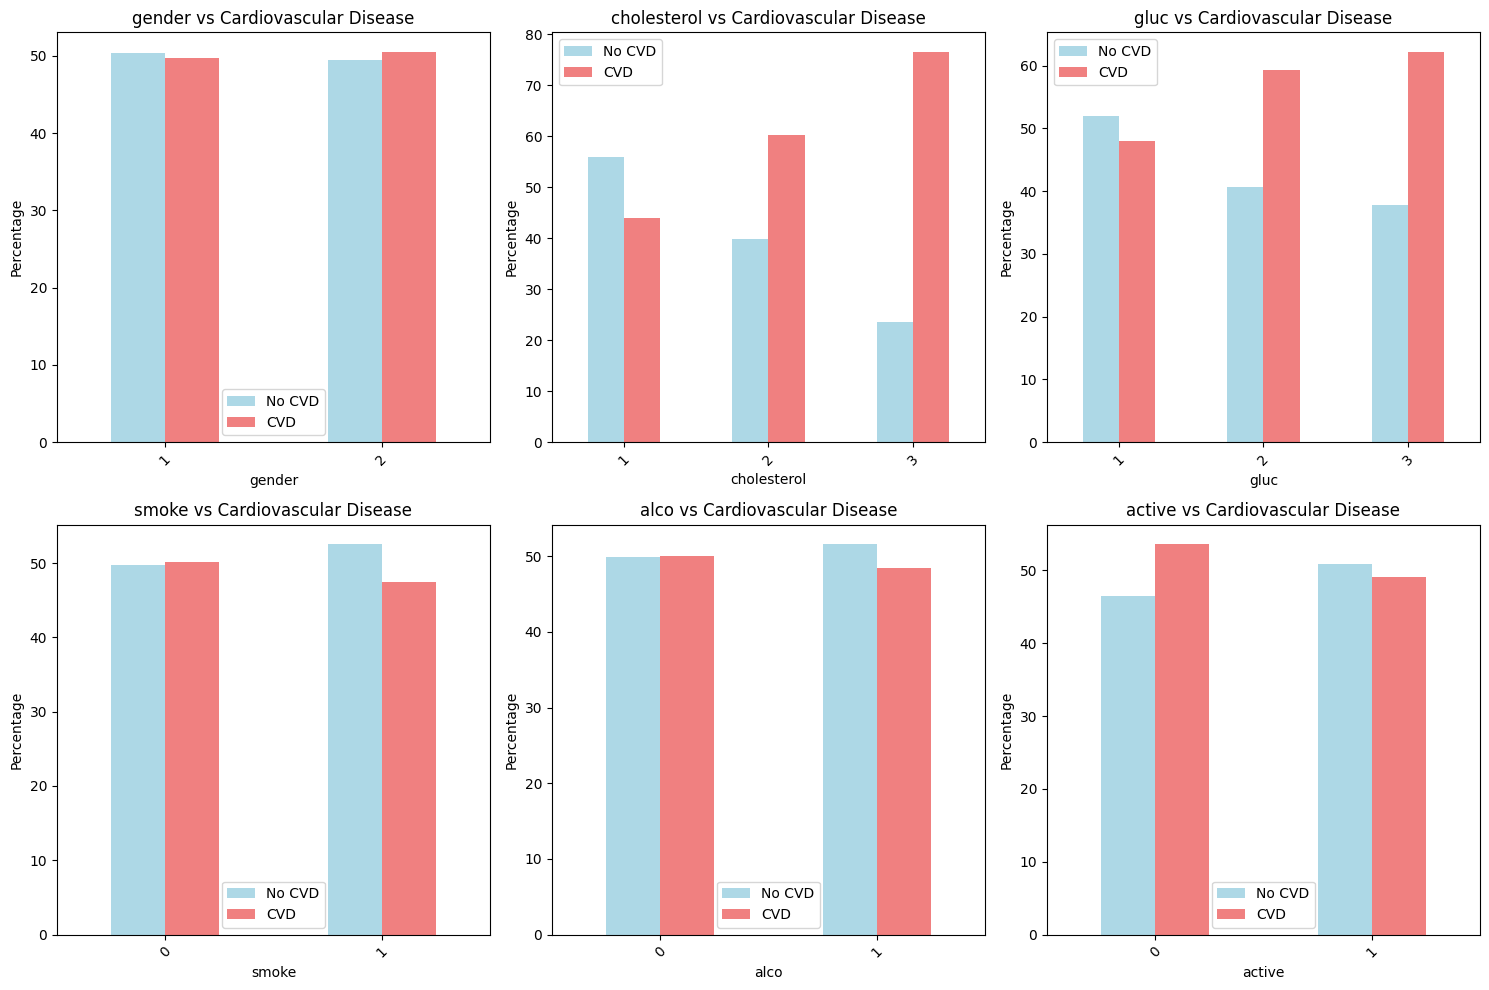

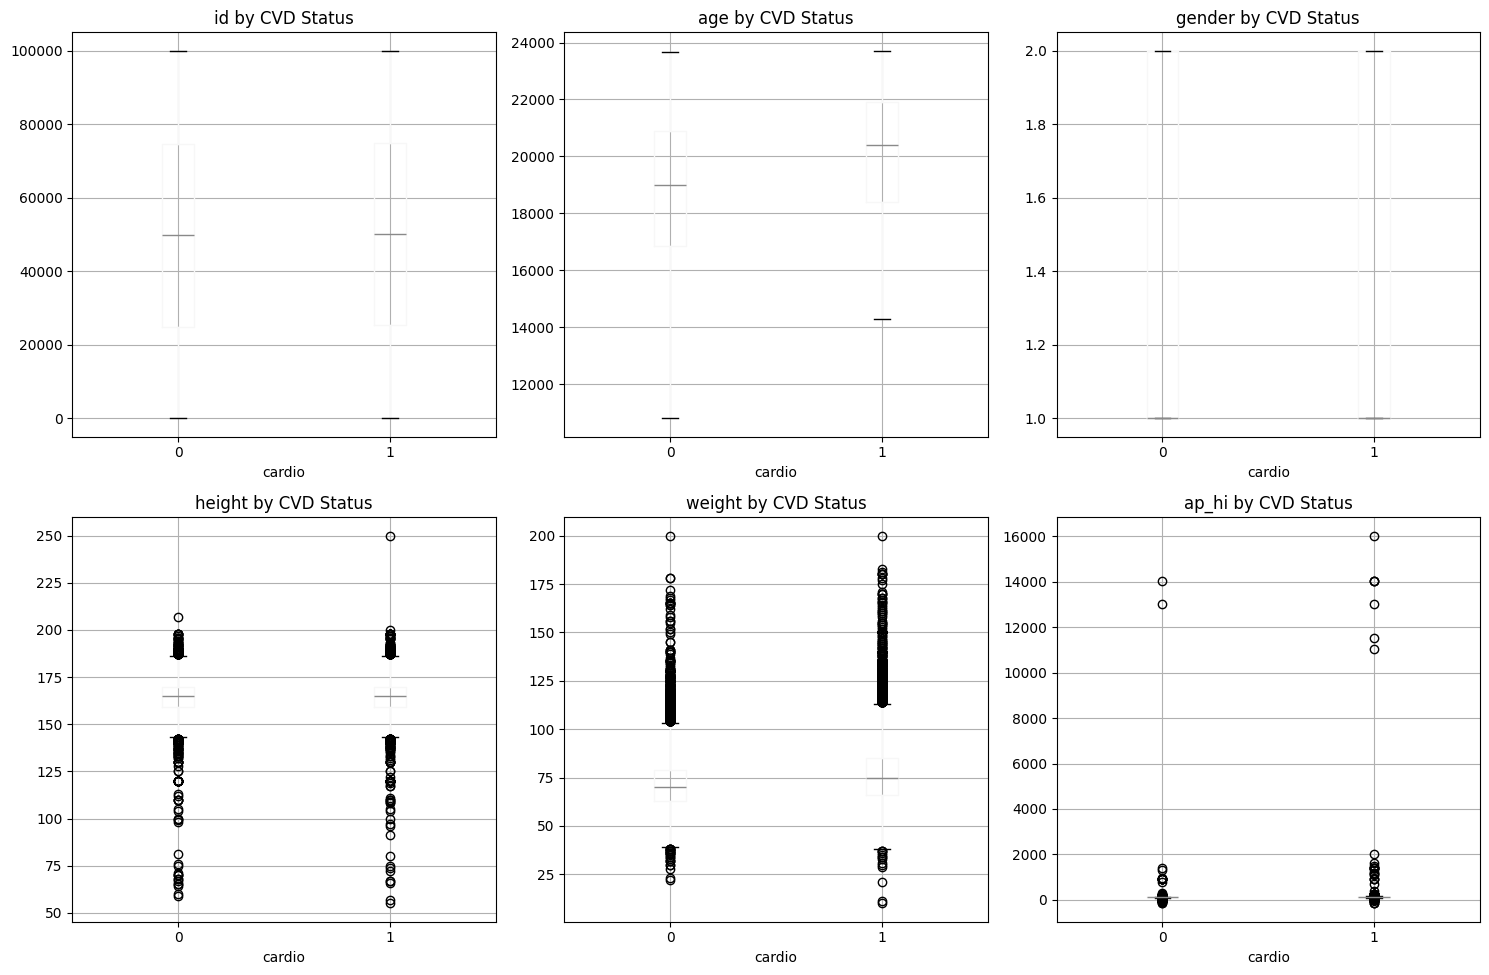

In [61]:
# =============================================================================
# 8. FEATURE RELATIONSHIPS WITH TARGET
# =============================================================================

if 'cardio' in df.columns:
    print("\n" + "=" * 40)
    print("🎯 RELATIONSHIPS WITH TARGET VARIABLE")
    print("=" * 40)
    
    # Categorical features vs target
    categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
    available_cat_cols = [col for col in categorical_cols if col in df.columns]
    
    if available_cat_cols:
        n_cols = 3
        n_rows = (len(available_cat_cols) + n_cols - 1) // n_cols
        
        plt.figure(figsize=(15, 5 * n_rows))
        for i, col in enumerate(available_cat_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            
            # Cross-tabulation
            ct = pd.crosstab(df[col], df['cardio'], normalize='index') * 100
            ct.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
            plt.title(f'{col} vs Cardiovascular Disease')
            plt.xlabel(col)
            plt.ylabel('Percentage')
            plt.legend(['No CVD', 'CVD'])
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Numerical features vs target
    numerical_for_target = [col for col in numerical_cols if col != 'cardio']
    
    if numerical_for_target:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numerical_for_target[:6], 1):  # Limit to first 6
            plt.subplot(2, 3, i)
            
            # Box plot by target
            df.boxplot(column=col, by='cardio', ax=plt.gca())
            plt.title(f'{col} by CVD Status')
            plt.suptitle('')  # Remove default title
        
        plt.tight_layout()
        plt.show()

In [62]:
# =============================================================================
# 9. KEY INSIGHTS SUMMARY
# =============================================================================

print("\n" + "=" * 60)
print("📋 KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"\n1. DATASET OVERVIEW:")
print(f"   • Total samples: {df.shape[0]:,}")
print(f"   • Total features: {df.shape[1]}")
print(f"   • Missing values: {df.isnull().sum().sum()}")

if 'cardio' in df.columns:
    cvd_rate = (df['cardio'].sum() / len(df)) * 100
    print(f"\n2. TARGET VARIABLE:")
    print(f"   • CVD prevalence: {cvd_rate:.1f}%")
    print(f"   • Class balance: {'Balanced' if abs(cvd_rate - 50) < 10 else 'Imbalanced'}")

print(f"\n3. DATA QUALITY:")
print(f"   • Complete cases: {df.dropna().shape[0]:,} ({(df.dropna().shape[0]/len(df)*100):.1f}%)")

# Age insights
if 'age' in df.columns:
    if df['age'].mean() > 365:
        age_years = df['age'] / 365.25
        print(f"   • Age range: {age_years.min():.0f} - {age_years.max():.0f} years")
        print(f"   • Average age: {age_years.mean():.1f} years")
    else:
        print(f"   • Age range: {df['age'].min():.0f} - {df['age'].max():.0f}")

print(f"\n4. OUTLIERS:")
total_outliers = sum([info['count'] for info in outlier_summary.values()])
print(f"   • Total outlier instances: {total_outliers:,}")
print(f"   • Features with most outliers: {max(outlier_summary.items(), key=lambda x: x[1]['count'])[0] if outlier_summary else 'None'}")

print(f"\n5. CORRELATIONS:")
if strong_corr:
    print(f"   • Strong correlations found: {len(strong_corr)}")
    print(f"   • Strongest correlation: {max(strong_corr, key=lambda x: abs(x[2]))[0]} ↔ {max(strong_corr, key=lambda x: abs(x[2]))[1]} ({max(strong_corr, key=lambda x: abs(x[2]))[2]:.3f})")
else:
    print(f"   • No strong correlations found")

print(f"\n6. RECOMMENDATIONS:")
print(f"   • Feature engineering: Calculate BMI, age groups, BP categories")
print(f"   • Data cleaning: {'Handle outliers' if total_outliers > 0 else 'Data appears clean'}")
print(f"   • Modeling: Consider feature scaling for numerical variables")

print("\n" + "=" * 60)
print("EDA COMPLETED SUCCESSFULLY! 🎉")
print("=" * 60)


📋 KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   • Total samples: 70,000
   • Total features: 13
   • Missing values: 0

2. TARGET VARIABLE:
   • CVD prevalence: 50.0%
   • Class balance: Balanced

3. DATA QUALITY:
   • Complete cases: 70,000 (100.0%)
   • Age range: 30 - 65 years
   • Average age: 53.3 years

4. OUTLIERS:
   • Total outlier instances: 42,602
   • Features with most outliers: active

5. CORRELATIONS:
   • No strong correlations found

6. RECOMMENDATIONS:
   • Feature engineering: Calculate BMI, age groups, BP categories
   • Data cleaning: Handle outliers
   • Modeling: Consider feature scaling for numerical variables

EDA COMPLETED SUCCESSFULLY! 🎉


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [63]:
# =============================================================================
# 1. DATA BACKUP AND INITIAL SETUP
# =============================================================================

print("=" * 60)
print("DATA PREPROCESSING PIPELINE - CARDIOVASCULAR DATASET")
print("=" * 60)

# Create backup of original data
df_original = df.copy()
df_clean = df.copy()

print(f"\n📋 Starting preprocessing with {df_clean.shape[0]:,} rows and {df_clean.shape[1]} columns")
print(f"Original dataset backed up as 'df_original'")

DATA PREPROCESSING PIPELINE - CARDIOVASCULAR DATASET

📋 Starting preprocessing with 70,000 rows and 13 columns
Original dataset backed up as 'df_original'


In [64]:
# =============================================================================
# 2. MISSING VALUES HANDLING
# =============================================================================

print("\n" + "=" * 50)
print("🔍 STEP 1: HANDLING MISSING VALUES")
print("=" * 50)

# Check for missing values
missing_summary = df_clean.isnull().sum()
missing_percent = (missing_summary / len(df_clean)) * 100

print("\nMissing Values Summary:")
for col, count, pct in zip(missing_summary.index, missing_summary.values, missing_percent.values):
    if count > 0:
        print(f"  {col}: {count} ({pct:.2f}%)")

if missing_summary.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"\n📊 Total missing values: {missing_summary.sum()}")
    
    # Strategy for handling missing values
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
    
    # Fill numerical missing values with median
    for col in numerical_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"  ✓ Filled {col} missing values with median: {median_val}")
    
    # Fill categorical missing values with mode
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"  ✓ Filled {col} missing values with mode: {mode_val}")

print(f"\n✅ Missing values handled. Current shape: {df_clean.shape}")


🔍 STEP 1: HANDLING MISSING VALUES

Missing Values Summary:
✅ No missing values found!

✅ Missing values handled. Current shape: (70000, 13)


In [65]:
# =============================================================================
# 3. DUPLICATE REMOVAL
# =============================================================================

print("\n" + "=" * 50)
print("🔄 STEP 2: REMOVING DUPLICATES")
print("=" * 50)

# Check for duplicates
n_duplicates = df_clean.duplicated().sum()
print(f"\nDuplicates found: {n_duplicates}")

if n_duplicates > 0:
    # Remove duplicates
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Removed {n_duplicates} duplicate rows")
    print(f"New dataset shape: {df_clean.shape}")
else:
    print("✅ No duplicates found!")


🔄 STEP 2: REMOVING DUPLICATES

Duplicates found: 0
✅ No duplicates found!


In [66]:
# =============================================================================
# 4. DATA TYPE CORRECTIONS AND FEATURE ENGINEERING
# =============================================================================

print("\n" + "=" * 50)
print("🔧 STEP 3: DATA TYPE CORRECTIONS & FEATURE ENGINEERING")
print("=" * 50)

# Convert age from days to years if needed
if 'age' in df_clean.columns and df_clean['age'].mean() > 365:
    df_clean['age_years'] = (df_clean['age'] / 365.25).round(0)
    print("✅ Created 'age_years' feature (converted from days)")
    
    # Create age groups
    df_clean['age_group'] = pd.cut(df_clean['age_years'], 
                                   bins=[0, 40, 50, 60, 100], 
                                   labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
    print("✅ Created 'age_group' feature")

# Calculate BMI if height and weight are available
if 'height' in df_clean.columns and 'weight' in df_clean.columns:
    df_clean['bmi'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)
    print("✅ Created 'bmi' feature")
    
    # BMI categories
    df_clean['bmi_category'] = pd.cut(df_clean['bmi'], 
                                      bins=[0, 18.5, 25, 30, 100], 
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    print("✅ Created 'bmi_category' feature")

# Blood pressure categories
if 'ap_hi' in df_clean.columns and 'ap_lo' in df_clean.columns:
    def bp_category(row):
        systolic = row['ap_hi']
        diastolic = row['ap_lo']
        
        if systolic < 120 and diastolic < 80:
            return 'Normal'
        elif systolic < 130 and diastolic < 80:
            return 'Elevated'
        elif (systolic >= 130 and systolic < 140) or (diastolic >= 80 and diastolic < 90):
            return 'Stage 1 Hypertension'
        elif systolic >= 140 or diastolic >= 90:
            return 'Stage 2 Hypertension'
        else:
            return 'Hypertensive Crisis'
    
    df_clean['bp_category'] = df_clean.apply(bp_category, axis=1)
    print("✅ Created 'bp_category' feature")

print(f"\nCurrent dataset shape after feature engineering: {df_clean.shape}")


🔧 STEP 3: DATA TYPE CORRECTIONS & FEATURE ENGINEERING
✅ Created 'age_years' feature (converted from days)
✅ Created 'age_group' feature
✅ Created 'bmi' feature
✅ Created 'bmi_category' feature
✅ Created 'bp_category' feature

Current dataset shape after feature engineering: (70000, 18)


In [67]:
# =============================================================================
# 5. OUTLIER DETECTION AND HANDLING
# =============================================================================

print("\n" + "=" * 50)
print("🚨 STEP 4: OUTLIER DETECTION AND HANDLING")
print("=" * 50)

# Define numerical columns for outlier detection
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
available_numerical = [col for col in numerical_cols if col in df_clean.columns]

# Add BMI if created
if 'bmi' in df_clean.columns:
    available_numerical.append('bmi')

outlier_summary = {}
df_no_outliers = df_clean.copy()

print("\n📊 Outlier Detection (IQR Method):")
for col in available_numerical:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    n_outliers = outliers_mask.sum()
    outlier_percent = (n_outliers / len(df_clean)) * 100
    
    outlier_summary[col] = {
        'count': n_outliers,
        'percentage': outlier_percent,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"  {col:<12}: {n_outliers:,} outliers ({outlier_percent:.1f}%)")

# Handle outliers using different strategies
print("\n🔧 Outlier Handling Strategy:")

# Strategy 1: Cap extreme outliers (beyond 3 IQR)
for col in available_numerical:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR
    
    # Cap extreme values
    extreme_outliers = ((df_clean[col] < extreme_lower) | (df_clean[col] > extreme_upper)).sum()
    
    if extreme_outliers > 0:
        df_clean[col] = df_clean[col].clip(lower=extreme_lower, upper=extreme_upper)
        print(f"  ✓ Capped {extreme_outliers} extreme outliers in {col}")

# Strategy 2: Remove physiologically impossible values
impossible_removed = 0

# Height: reasonable range 100-250 cm
if 'height' in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean[(df_clean['height'] >= 100) & (df_clean['height'] <= 250)]
    removed = before - len(df_clean)
    impossible_removed += removed
    if removed > 0:
        print(f"  ✓ Removed {removed} rows with impossible height values")

# Weight: reasonable range 20-300 kg
if 'weight' in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean[(df_clean['weight'] >= 20) & (df_clean['weight'] <= 300)]
    removed = before - len(df_clean)
    impossible_removed += removed
    if removed > 0:
        print(f"  ✓ Removed {removed} rows with impossible weight values")

# Blood pressure: reasonable ranges
if 'ap_hi' in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean[(df_clean['ap_hi'] >= 70) & (df_clean['ap_hi'] <= 250)]
    removed = before - len(df_clean)
    impossible_removed += removed
    if removed > 0:
        print(f"  ✓ Removed {removed} rows with impossible systolic BP values")

if 'ap_lo' in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean[(df_clean['ap_lo'] >= 40) & (df_clean['ap_lo'] <= 150)]
    removed = before - len(df_clean)
    impossible_removed += removed
    if removed > 0:
        print(f"  ✓ Removed {removed} rows with impossible diastolic BP values")

# Logical check: systolic should be higher than diastolic
if 'ap_hi' in df_clean.columns and 'ap_lo' in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean[df_clean['ap_hi'] > df_clean['ap_lo']]
    removed = before - len(df_clean)
    impossible_removed += removed
    if removed > 0:
        print(f"  ✓ Removed {removed} rows where systolic <= diastolic BP")

print(f"\n📊 Total impossible values removed: {impossible_removed}")
print(f"Dataset shape after outlier handling: {df_clean.shape}")


🚨 STEP 4: OUTLIER DETECTION AND HANDLING

📊 Outlier Detection (IQR Method):
  age         : 4 outliers (0.0%)
  height      : 519 outliers (0.7%)
  weight      : 1,819 outliers (2.6%)
  ap_hi       : 1,435 outliers (2.1%)
  ap_lo       : 4,632 outliers (6.6%)
  bmi         : 1,995 outliers (2.9%)

🔧 Outlier Handling Strategy:
  ✓ Capped 93 extreme outliers in height
  ✓ Capped 171 extreme outliers in weight
  ✓ Capped 288 extreme outliers in ap_hi
  ✓ Capped 1136 extreme outliers in ap_lo
  ✓ Capped 282 extreme outliers in bmi
  ✓ Removed 2 rows with impossible weight values
  ✓ Removed 189 rows with impossible systolic BP values
  ✓ Removed 131 rows where systolic <= diastolic BP

📊 Total impossible values removed: 322
Dataset shape after outlier handling: (69678, 18)


In [68]:
# =============================================================================
# 6. ENCODING CATEGORICAL VARIABLES
# =============================================================================

print("\n" + "=" * 50)
print("🔤 STEP 5: ENCODING CATEGORICAL VARIABLES")
print("=" * 50)

# Identify categorical columns
categorical_columns = []
binary_columns = []

for col in df_clean.columns:
    if df_clean[col].dtype == 'object' or df_clean[col].nunique() <= 10:
        unique_vals = df_clean[col].nunique()
        if unique_vals == 2:
            binary_columns.append(col)
        elif unique_vals > 2:
            categorical_columns.append(col)

print(f"Binary columns found: {binary_columns}")
print(f"Categorical columns found: {categorical_columns}")

# Create encoded dataset
df_encoded = df_clean.copy()

# Binary encoding (0/1)
for col in binary_columns:
    if col not in ['cardio']:  # Skip target variable
        unique_vals = df_encoded[col].unique()
        if len(unique_vals) == 2:
            # Map to 0 and 1
            mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
            df_encoded[f'{col}_encoded'] = df_encoded[col].map(mapping)
            print(f"  ✓ Binary encoded {col}: {mapping}")

# One-hot encoding for multi-class categorical variables
categorical_to_encode = [col for col in categorical_columns if col not in ['cardio']]

if categorical_to_encode:
    print(f"\nOne-hot encoding columns: {categorical_to_encode}")
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_to_encode, prefix=categorical_to_encode)
    print(f"  ✓ Created dummy variables for {len(categorical_to_encode)} columns")

print(f"\nDataset shape after encoding: {df_encoded.shape}")


🔤 STEP 5: ENCODING CATEGORICAL VARIABLES
Binary columns found: ['gender', 'smoke', 'alco', 'active', 'cardio']
Categorical columns found: ['cholesterol', 'gluc', 'age_group', 'bmi_category', 'bp_category']
  ✓ Binary encoded gender: {2: 0, 1: 1}
  ✓ Binary encoded smoke: {0: 0, 1: 1}
  ✓ Binary encoded alco: {0: 0, 1: 1}
  ✓ Binary encoded active: {1: 0, 0: 1}

One-hot encoding columns: ['cholesterol', 'gluc', 'age_group', 'bmi_category', 'bp_category']
  ✓ Created dummy variables for 5 columns

Dataset shape after encoding: (69678, 35)


In [69]:
# =============================================================================
# 7. FEATURE SCALING/NORMALIZATION
# =============================================================================

print("\n" + "=" * 50)
print("📏 STEP 6: FEATURE SCALING AND NORMALIZATION")
print("=" * 50)

# Identify numerical columns for scaling
numerical_for_scaling = []
for col in df_encoded.columns:
    if df_encoded[col].dtype in ['int64', 'float64'] and col != 'cardio':
        if df_encoded[col].nunique() > 10:  # Skip binary/categorical encoded features
            numerical_for_scaling.append(col)

print(f"Columns to be scaled: {numerical_for_scaling}")

# Create different scaled versions
df_standardized = df_encoded.copy()
df_normalized = df_encoded.copy()

# StandardScaler (z-score normalization)
if numerical_for_scaling:
    scaler_standard = StandardScaler()
    df_standardized[numerical_for_scaling] = scaler_standard.fit_transform(df_encoded[numerical_for_scaling])
    print("✅ Applied StandardScaler (z-score normalization)")
    
    # MinMaxScaler (0-1 normalization)
    scaler_minmax = MinMaxScaler()
    df_normalized[numerical_for_scaling] = scaler_minmax.fit_transform(df_encoded[numerical_for_scaling])
    print("✅ Applied MinMaxScaler (0-1 normalization)")


📏 STEP 6: FEATURE SCALING AND NORMALIZATION
Columns to be scaled: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']
✅ Applied StandardScaler (z-score normalization)
✅ Applied MinMaxScaler (0-1 normalization)


In [70]:
# =============================================================================
# 8. BINNING/DISCRETIZATION
# =============================================================================

print("\n" + "=" * 50)
print("📊 STEP 7: BINNING AND DISCRETIZATION")
print("=" * 50)

df_binned = df_encoded.copy()

# Age binning (if not already done)
if 'age_years' in df_binned.columns and 'age_group' not in df_binned.columns:
    df_binned['age_group'] = pd.cut(df_binned['age_years'], 
                                    bins=[0, 40, 50, 60, 100], 
                                    labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
    print("✅ Created age groups")

# BMI binning (if not already done)
if 'bmi' in df_binned.columns and 'bmi_category' not in df_binned.columns:
    df_binned['bmi_category'] = pd.cut(df_binned['bmi'], 
                                       bins=[0, 18.5, 25, 30, 100], 
                                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    print("✅ Created BMI categories")

# Blood pressure binning
if 'ap_hi' in df_binned.columns:
    df_binned['systolic_category'] = pd.cut(df_binned['ap_hi'], 
                                            bins=[0, 120, 130, 140, 300], 
                                            labels=['Normal', 'Elevated', 'Stage1_HTN', 'Stage2_HTN'])
    print("✅ Created systolic BP categories")

if 'ap_lo' in df_binned.columns:
    df_binned['diastolic_category'] = pd.cut(df_binned['ap_lo'], 
                                             bins=[0, 80, 85, 90, 200], 
                                             labels=['Normal', 'Elevated', 'Stage1_HTN', 'Stage2_HTN'])
    print("✅ Created diastolic BP categories")

print(f"\nDataset shape after binning: {df_binned.shape}")


📊 STEP 7: BINNING AND DISCRETIZATION
✅ Created age groups
✅ Created BMI categories
✅ Created systolic BP categories
✅ Created diastolic BP categories

Dataset shape after binning: (69678, 39)


In [71]:
# =============================================================================
# 9. DATA VALIDATION AND QUALITY CHECKS
# =============================================================================

print("\n" + "=" * 50)
print("✅ STEP 8: DATA VALIDATION AND QUALITY CHECKS")
print("=" * 50)

# Final validation
print("Final Data Quality Report:")
print(f"  • Original dataset: {df_original.shape}")
print(f"  • Cleaned dataset: {df_clean.shape}")
print(f"  • Encoded dataset: {df_encoded.shape}")
print(f"  • Standardized dataset: {df_standardized.shape}")
print(f"  • Normalized dataset: {df_normalized.shape}")
print(f"  • Binned dataset: {df_binned.shape}")

# Check for any remaining issues
print(f"\n📊 Quality Metrics:")
print(f"  • Missing values: {df_clean.isnull().sum().sum()}")
print(f"  • Duplicate rows: {df_clean.duplicated().sum()}")
print(f"  • Data types: {df_clean.dtypes.value_counts().to_dict()}")

# Feature summary
if 'cardio' in df_clean.columns:
    target_distribution = df_clean['cardio'].value_counts(normalize=True) * 100
    print(f"  • Target distribution: {target_distribution.to_dict()}")


✅ STEP 8: DATA VALIDATION AND QUALITY CHECKS
Final Data Quality Report:
  • Original dataset: (70000, 13)
  • Cleaned dataset: (69678, 18)
  • Encoded dataset: (69678, 35)
  • Standardized dataset: (69678, 35)
  • Normalized dataset: (69678, 35)
  • Binned dataset: (69678, 39)

📊 Quality Metrics:
  • Missing values: 28
  • Duplicate rows: 0
  • Data types: {dtype('int64'): 12, dtype('float64'): 3, CategoricalDtype(categories=['Young', 'Middle-aged', 'Senior', 'Elderly'], ordered=True, categories_dtype=object): 1, CategoricalDtype(categories=['Underweight', 'Normal', 'Overweight', 'Obese'], ordered=True, categories_dtype=object): 1, dtype('O'): 1}
  • Target distribution: {0: 50.040184850311434, 1: 49.959815149688566}


In [72]:
# =============================================================================
# 10. SAVE PROCESSED DATASETS
# =============================================================================

print("\n" + "=" * 50)
print("💾 STEP 9: CREATING FINAL DATASETS")
print("=" * 50)

# Create final datasets for modeling
datasets = {
    'df_original': df_original,
    'df_clean': df_clean,
    'df_encoded': df_encoded,
    'df_standardized': df_standardized,
    'df_normalized': df_normalized,
    'df_binned': df_binned
}

print("Available datasets for modeling:")
for name, dataset in datasets.items():
    print(f"  • {name}: {dataset.shape} - {name.replace('df_', '').replace('_', ' ').title()}")


💾 STEP 9: CREATING FINAL DATASETS
Available datasets for modeling:
  • df_original: (70000, 13) - Original
  • df_clean: (69678, 18) - Clean
  • df_encoded: (69678, 35) - Encoded
  • df_standardized: (69678, 35) - Standardized
  • df_normalized: (69678, 35) - Normalized
  • df_binned: (69678, 39) - Binned


In [74]:
# =============================================================================
# 11. PREPROCESSING SUMMARY AND EXPORT
# =============================================================================

print("\n" + "=" * 60)
print("📋 PREPROCESSING SUMMARY AND EXPORT")
print("=" * 60)

print(f"\n✅ COMPLETED PREPROCESSING STEPS:")
print(f"   1. ✓ Missing Values: {'Handled' if df_original.isnull().sum().sum() > 0 else 'None found'}")
print(f"   2. ✓ Duplicates: {'Removed' if n_duplicates > 0 else 'None found'}")
print(f"   3. ✓ Feature Engineering: Created {df_clean.shape[1] - df_original.shape[1]} new features")
print(f"   4. ✓ Outliers: Handled extreme values and impossible data")
print(f"   5. ✓ Encoding: Processed categorical variables")
print(f"   6. ✓ Scaling: Applied StandardScaler and MinMaxScaler")
print(f"   7. ✓ Binning: Created categorical bins for continuous variables")

print(f"\n📊 KEY STATISTICS:")
rows_removed = df_original.shape[0] - df_clean.shape[0]
features_added = df_encoded.shape[1] - df_original.shape[1]
print(f"   • Rows removed: {rows_removed} ({(rows_removed/df_original.shape[0]*100):.1f}%)")
print(f"   • Features added: {features_added}")
print(f"   • Final data quality: {((df_clean.shape[0] - df_clean.isnull().sum().sum())/df_clean.shape[0]*100):.1f}% complete")

# 💾 EXPORT DATA
for name, df in datasets.items():
    if 'id' in df.columns:
        datasets[name] = df.drop(columns=['id'])
    
output_path = "cardiovascular_disease_preprocessing.csv"
df_normalized.to_csv(output_path, index=False)

print("\n✅ Final preprocessed data exported to:")
print(f"   → {output_path}")


print("\n" + "=" * 60)
print("PREPROCESSING PIPELINE COMPLETED SUCCESSFULLY! 🎉")
print("=" * 60)


📋 PREPROCESSING SUMMARY AND EXPORT

✅ COMPLETED PREPROCESSING STEPS:
   1. ✓ Missing Values: None found
   2. ✓ Duplicates: None found
   3. ✓ Feature Engineering: Created 5 new features
   4. ✓ Outliers: Handled extreme values and impossible data
   5. ✓ Encoding: Processed categorical variables
   6. ✓ Scaling: Applied StandardScaler and MinMaxScaler
   7. ✓ Binning: Created categorical bins for continuous variables

📊 KEY STATISTICS:
   • Rows removed: 322 (0.5%)
   • Features added: 22
   • Final data quality: 100.0% complete

✅ Final preprocessed data exported to:
   → cardiovascular_disease_preprocessing.csv

PREPROCESSING PIPELINE COMPLETED SUCCESSFULLY! 🎉
